In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN

In [14]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
crime= pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# DBSCAN

In [3]:
from sklearn.cluster import DBSCAN

In [4]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
norm=mm.fit_transform(crime.iloc[:,1:])
norm

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [5]:
## we need to find the optimal values for 'eps' adn 'min_samples'
from sklearn.neighbors import NearestNeighbors

In [6]:
neigh=NearestNeighbors(n_neighbors=3).fit(norm)

In [7]:
d,index=neigh.kneighbors(norm)


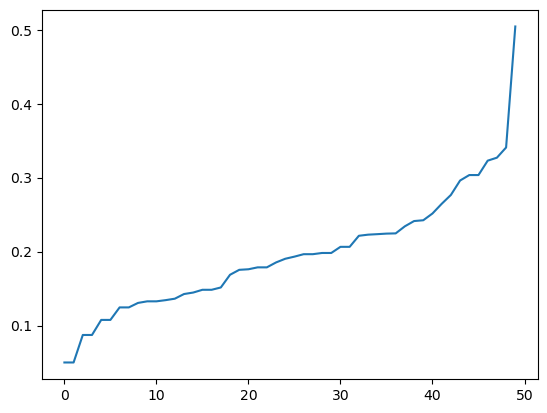

In [8]:
dist=np.sort(d[:,1])
plt.plot(dist)
plt.show()

In [9]:
# from the above plot taking the 'eps' value 0.20
db=DBSCAN(eps=0.20,min_samples=4)

In [10]:
predict11=db.fit_predict(norm)

In [12]:
crime['cluster DBSCAN']=predict11
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster DBSCAN
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


In [15]:
# Analysing the  cluster
crime.groupby('cluster DBSCAN').agg('mean')

,Murder,Assault,UrbanPop,Rape
cluster DBSCAN,,,,
-1,9.439394,207.060606,68.303030,24.500000
0,4.582353,100.294118,60.176471,14.888235


In [16]:
## checking silhoutte score
from sklearn.metrics import silhouette_score
silhouette_score(norm,predict11)

0.20352521583251446

In [17]:
# states in cluster -1
crime[crime['cluster DBSCAN']==-1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster DBSCAN
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


In [18]:
# states in cluster 0
crime[crime['cluster DBSCAN']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster DBSCAN
11,Idaho,2.6,120,54,14.2,0
13,Indiana,7.2,113,65,21.0,0
14,Iowa,2.2,56,57,11.3,0
15,Kansas,6.0,115,66,18.0,0
18,Maine,2.1,83,51,7.8,0
22,Minnesota,2.7,72,66,14.9,0
25,Montana,6.0,109,53,16.4,0
26,Nebraska,4.3,102,62,16.5,0
28,New Hampshire,2.1,57,56,9.5,0
33,North Dakota,0.8,45,44,7.3,0


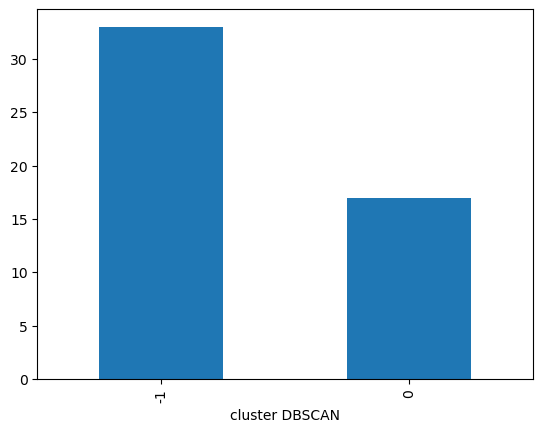

In [19]:
crime.groupby(['cluster DBSCAN']).count()['Unnamed: 0'].plot(kind='bar')
plt.show()